In [13]:
import torch
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
# prepare dataset

batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST(root='../dataset/mnist/', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_dataset = datasets.MNIST(root='../dataset/mnist/', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [15]:
# design model using class


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = torch.nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = torch.nn.MaxPool2d(2)
        self.fc = torch.nn.Linear(320, 10)

    def forward(self, x): # 输入一组batch数据（64 * 1 * 28 * 28）
        # flatten data from (n,1,28,28) to (n, 784)

        batch_size = x.size(0)
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = x.view(batch_size, -1)  # -1 此处自动算出的是320
        # print("x.shape",x.shape)
        x = self.fc(x)

        return x

In [16]:
model = Net()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# construct loss and optimizer
criterion = torch.nn.CrossEntropyLoss()

# 此处optimizer获得了所有参数的引用
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)



In [17]:
# training cycle forward, backward, update
def train(epoch):
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0): # batch从0开始。返回一组batch数据和标签
        inputs, target = data # 可以直接将一组batch数据和标签tensor分开
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, target) # 产生梯度
        loss.backward() # 将梯度传播到网络的所有节点
        optimizer.step() # 应用新的梯度，并更新参数值

        running_loss += loss.item()
        if batch_idx % 300 == 299:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_idx + 1, running_loss / 300))
            running_loss = 0.0


def test():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('accuracy on test set: %d %% ' % (100 * correct / total))
    return correct / total

accuracy on test set: 97 % 
[3,   300] loss: 0.076
[3,   600] loss: 0.080
[3,   900] loss: 0.065
accuracy on test set: 98 % 
[4,   300] loss: 0.064
[4,   600] loss: 0.060
[4,   900] loss: 0.060
accuracy on test set: 98 % 
[5,   300] loss: 0.057
[5,   600] loss: 0.054
[5,   900] loss: 0.048
accuracy on test set: 98 % 
[6,   300] loss: 0.052
[6,   600] loss: 0.046
[6,   900] loss: 0.049
accuracy on test set: 98 % 
[7,   300] loss: 0.045
[7,   600] loss: 0.041
[7,   900] loss: 0.045
accuracy on test set: 98 % 
[8,   300] loss: 0.041
[8,   600] loss: 0.044
[8,   900] loss: 0.037
accuracy on test set: 98 % 
[9,   300] loss: 0.040
[9,   600] loss: 0.035
[9,   900] loss: 0.039
accuracy on test set: 98 % 
[10,   300] loss: 0.035
[10,   600] loss: 0.036
[10,   900] loss: 0.034
accuracy on test set: 98 % 


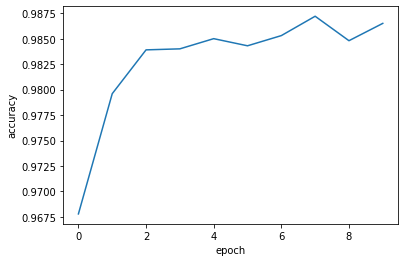

[1,   300] loss: 0.654
[1,   600] loss: 0.188
[1,   900] loss: 0.138
accuracy on test set: 96 % 
[2,   300] loss: 0.103
[2,   600] loss: 0.097
[2,   900] loss: 0.089
accuracy on test set: 97 % 
[3,   300] loss: 0.079
[3,   600] loss: 0.071
[3,   900] loss: 0.068
accuracy on test set: 98 % 
[4,   300] loss: 0.061
[4,   600] loss: 0.060
[4,   900] loss: 0.064
accuracy on test set: 98 % 
[5,   300] loss: 0.056
[5,   600] loss: 0.054
[5,   900] loss: 0.052
accuracy on test set: 98 % 
[6,   300] loss: 0.049
[6,   600] loss: 0.048
[6,   900] loss: 0.049
accuracy on test set: 98 % 
[7,   300] loss: 0.046
[7,   600] loss: 0.045
[7,   900] loss: 0.042
accuracy on test set: 98 % 
[8,   300] loss: 0.042
[8,   600] loss: 0.037
[8,   900] loss: 0.045
accuracy on test set: 98 % 
[9,   300] loss: 0.040
[9,   600] loss: 0.038
[9,   900] loss: 0.036
accuracy on test set: 98 % 
[10,   300] loss: 0.035
[10,   600] loss: 0.039
[10,   900] loss: 0.035
accuracy on test set: 98 % 


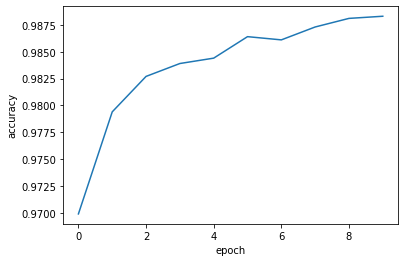

[1,   300] loss: 0.578
[1,   600] loss: 0.196
[1,   900] loss: 0.148
accuracy on test set: 96 % 
[2,   300] loss: 0.108
[2,   600] loss: 0.100
[2,   900] loss: 0.096
accuracy on test set: 97 % 
[3,   300] loss: 0.077
[3,   600] loss: 0.079
[3,   900] loss: 0.074
accuracy on test set: 98 % 
[4,   300] loss: 0.065
[4,   600] loss: 0.064
[4,   900] loss: 0.063
accuracy on test set: 97 % 
[5,   300] loss: 0.060
[5,   600] loss: 0.057
[5,   900] loss: 0.054
accuracy on test set: 98 % 
[6,   300] loss: 0.051
[6,   600] loss: 0.055
[6,   900] loss: 0.050
accuracy on test set: 98 % 
[7,   300] loss: 0.044
[7,   600] loss: 0.049
[7,   900] loss: 0.048
accuracy on test set: 98 % 
[8,   300] loss: 0.044
[8,   600] loss: 0.048
[8,   900] loss: 0.039
accuracy on test set: 98 % 
[9,   300] loss: 0.043
[9,   600] loss: 0.039
[9,   900] loss: 0.042
accuracy on test set: 98 % 
[10,   300] loss: 0.037
[10,   600] loss: 0.038
[10,   900] loss: 0.040
accuracy on test set: 98 % 


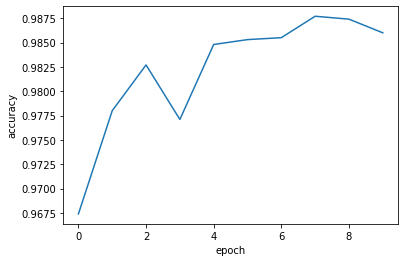

In [18]:
if __name__ == '__main__':
    epoch_list = []
    acc_list = []

    for epoch in range(10):
        train(epoch)
        acc = test()
        epoch_list.append(epoch)
        acc_list.append(acc)

    plt.plot(epoch_list, acc_list)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()

